<a href="https://colab.research.google.com/github/tonci0000/Rjeseni_LV_MSAP/blob/main/toni_ivic_predrok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro, levene, mannwhitneyu, chi2_contingency
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [32]:
df = pd.read_csv("energydata_complete.csv")

In [46]:
print("Ispis svih varijabli\n",df.head())
print("Prikaz tipova varijabli i osnovnih informacija o skupu podataka",df.info())
print("Opisna statistika za numeričke varijable\n",df.describe())
print("Opisna statistika za numeričke varijable\n",df.count())
print("Pregled broja redaka i stupaca u skupu podataka\n",df.shape)
print("Veličina uzorka :\n",len(df))

Ispis svih varijabli
                   date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out 

Učitavanjem podataka vidimo da baza podataka prikazuje potrošnju kućanskih aparata

Baza se sastoji samo od numeričkih vrijednosti kao što su: appliances,lights,RH_out,T_out, i drugih vrijednosti

Utvrdili smo da nema NaN vrijednosti, i uklonili smo duplikate

Od opisne statistike vidimo da Appliances ima srednju vrijednost od 97.694958, standardnu devijaciju od 102.5, minimalnu vrijednost 10, a maksimalnu 1080.0

Pregledom veličine uzorka utvrdili smo da je uzorak velik 19735

In [34]:
print(df.isnull().sum())

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [35]:
df.drop_duplicates()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [56]:
df_chosen = df[['Appliances','T_out','RH_out']]
print(df_chosen.head())
print("\nOsnovne informacije o skupu podataka:")
print(df_chosen.info())

   Appliances     T_out  RH_out
0          60  6.600000    92.0
1          60  6.483333    92.0
2          50  6.366667    92.0
3          50  6.250000    92.0
4          60  6.133333    92.0

Osnovne informacije o skupu podataka:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Appliances  19735 non-null  int64  
 1   T_out       19735 non-null  float64
 2   RH_out      19735 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 462.7 KB
None


Od varijabli za daljnju analizu sam odabrao: Appliances, T_out i RH_out

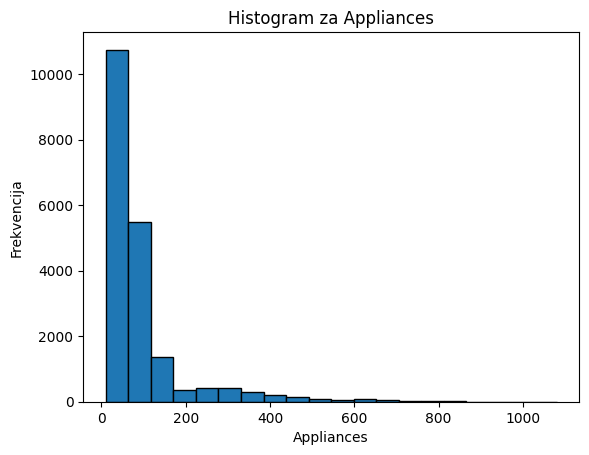

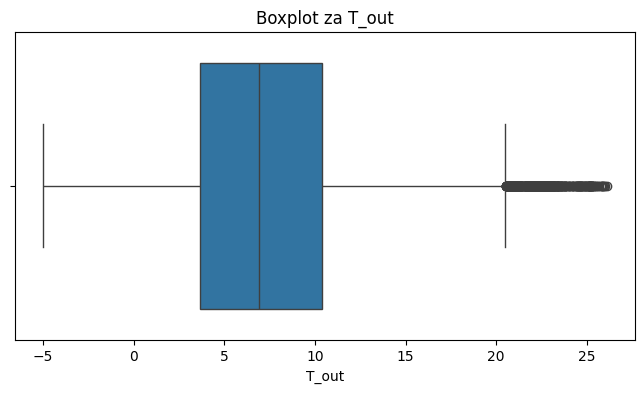

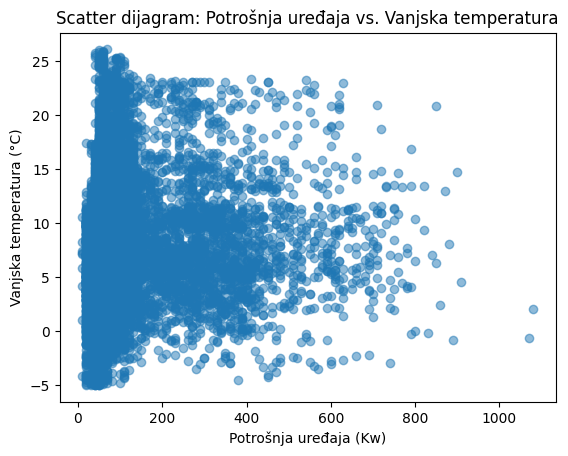

In [58]:
plt.hist(df_chosen['Appliances'], bins=20,edgecolor="black")
plt.title("Histogram za Appliances")
plt.xlabel("Appliances")
plt.ylabel("Frekvencija")
plt.show()
print("\n")

plt.figure(figsize=(8,4))
sns.boxplot(x=df_chosen['T_out'])
plt.title("Boxplot za T_out")
plt.xlabel("T_out")
plt.show()
print("\n")

plt.scatter(df_chosen["Appliances"], df_chosen["T_out"], alpha=0.5)
plt.xlabel("Potrošnja uređaja (Kw)")
plt.ylabel("Vanjska temperatura (°C)")
plt.title("Scatter dijagram: Potrošnja uređaja vs. Vanjska temperatura")
plt.show()

Histogramom smo prikazali frekvenciju pojavljivanja Appliances i vidi se da najveća frekvencija potrošnje uređaja je između 0 i 100 KW

Boxplot prikazuje varijablu T_out, i vidi se da ima jaku puno outlayera

Scatter dijagramom smo prikazali odnos potrošnje uređaja s vanjskom temperaturom

In [41]:
min = df_chosen[df_chosen["Appliances"] < 60]["T_out"]
max = df_chosen[df_chosen["Appliances"] > 70]["T_out"]
print(min.shape,max.shape)

min_sample = min.sample(7000, random_state=1)
max_sample = max.sample(7000, random_state=1)
print(min_sample)
print(max_sample)

(7462,) (7431,)
7408      2.400000
9295      2.366667
19097    11.433333
474       0.800000
18236     9.866667
           ...    
2641      9.050000
9482      9.533333
11197     8.683333
2833      5.083333
19192    11.100000
Name: T_out, Length: 7000, dtype: float64
10955    10.316667
8031      2.750000
5577      2.850000
7928      2.900000
16521    14.150000
           ...    
13393    10.016667
12788    11.500000
18866    23.000000
6024     10.600000
593       2.500000
Name: T_out, Length: 7000, dtype: float64


Pošto je uzorak poprilično velik, skratio sam uzorak sa 19735 na 7000 kako bi mogao dalje provoditi analizu

In [47]:
#2 Ispitivanje normalnosti distribucije (Shapiro-Wilk test) i jednakosti varijanci (Leveneov test)
# Shapiro-Wilk test normalnosti
min_shapiro = shapiro(min_sample)
max_shapiro = shapiro(max_sample)

print("Shapiro min:", min_shapiro.pvalue)  #<0.05
print("Shapiro max:", max_shapiro.pvalue)    #<0.05
# Ako je p < 0.05 → distribucija NIJE normalna => Mann-Whitney U test
# Ako je p > 0.05 → distribucija je normalna => t-test

#provjera jednakosti varijanci (Leveneov test)
lev = levene(min_sample, max_sample)
print("Levene p-vrijednost:", lev.pvalue) #<0.05
# Ako je p > 0.05 → varijance su jednake (homoskedastičnost)
# Ako je p < 0.05 → varijance se razlikuju (heteroskedastičnost)

Shapiro min: 5.708495481256357e-23
Shapiro max: 2.5934143341481285e-34
Levene p-vrijednost: 1.497343806418169e-17


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7000.
  res = hypotest_fun_out(*samples, **kwds)


Provjerom Shapirom testom vidimo da je p < 0.05 i zaključujemo da uzorak nije iz normalne distribucije

p: 2.62485380321591e-44
Postoji značajna linearna veza između Appliances i T_out (odbacujemo nultu hipotezu).


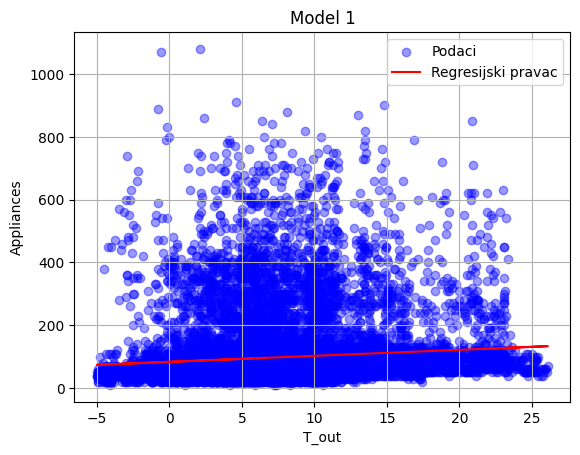

In [48]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df_chosen["T_out"], df_chosen["Appliances"])
intercept_err1 = stats.linregress(df_chosen["T_out"], df_chosen["Appliances"]).intercept_stderr
print("p:",p_value1)

# H0 = nema linearne veze između Appliances i T_out
# H1 = postoji linearna veza između Appliances i T_out

if p_value1 < 0.05:
    print("Postoji značajna linearna veza između Appliances i T_out (odbacujemo nultu hipotezu).")
else:
    print("Nema dovoljno dokaza za postojanje značajne linearne veze Appliances i T_out (ne odbacujemo nultu hipotezu).")

y_pred1 = intercept1 + slope1 * df_chosen["T_out"]

plt.scatter(df_chosen["T_out"], df_chosen["Appliances"], color='blue', label='Podaci', alpha=0.4)
plt.plot(df_chosen["T_out"], y_pred1, color='red', label='Regresijski pravac')
plt.xlabel('T_out')
plt.ylabel('Appliances')
plt.title('Model 1')
plt.legend()
plt.grid()
plt.show()


In [49]:
print("Model 1\n")
print(f"Nagib (slope): {slope1}")
print(f"Značenje nagiba: Potrošnja uređaja prosječno se mijenja za {slope1:.4f} za svako povećanje vanjske temperature za 1 jedinicu.")
print(f"Odsječak (intercept): Kada je vanjska temperatura 0, onda je potrošnja uređaja {intercept1}")
print(f"R^2: {r_value1**2:.4f}")
print("R^2 govori koliki postotak varijance u Y se može objasniti X-om")
print(f"Jednadžba: yA = {intercept1:.4f} + {slope1:.4f}*x1")

Model 1

Nagib (slope): 1.9117995408929978
Značenje nagiba: Potrošnja uređaja prosječno se mijenja za 1.9118 za svako povećanje vanjske temperature za 1 jedinicu.
Odsječak (intercept): Kada je vanjska temperatura 0, onda je potrošnja uređaja 83.52534130191101
R^2: 0.0098
R^2 govori koliki postotak varijance u Y se može objasniti X-om
Jednadžba: yA = 83.5253 + 1.9118*x1


Iako prema testovima postoji linearna veza između Appliances i T_out, sam pravac nema tu linearnost zbog veličine uzorka i puno outlayer-a

In [51]:
#3 Odabir testa (t-test za nezavisne uzorke ili Mann–Whitney U test) ovisno o zadovoljenju pretpostavki.
# Mann-Whitney U test (neparametrijski)
u_stat, p_val = mannwhitneyu(min_sample, max_sample)

print("Mann-Whitney U statistika:", u_stat)
print("p-vrijednost:", p_val)

Mann-Whitney U statistika: 17483559.0
p-vrijednost: 2.7857568241984932e-189


Mann-Whitney U testom vidimo da ima razlike između grupa zato što je p < 0.05

In [66]:
confidence_level = 0.95
n = len(df_chosen)
t_critical1 = stats.t.ppf((1 + confidence_level) / 2, df=n-2)
margin_of_error1 = t_critical1 * std_err1
lower_bound1 = slope1 - margin_of_error1
upper_bound1 = slope1 + margin_of_error1

# Interpretacija intervala povjerenja
print("S 95% sigurnošću vjerujemo da je stvarni nagib između {:.4f} i {:.4f}.".format(lower_bound1, upper_bound1))

n = len(df_chosen)
t_critical11 = stats.t.ppf((1 + confidence_level) / 2, df=n-2)
margin_of_error11 = t_critical11 * intercept_err1
lower_bound11 = intercept1 - margin_of_error11
upper_bound11 = intercept1 + margin_of_error11
print(f"S 95% sigurnosti možemo tvrditi da se intercept (odsječak na osi y) modela A nalazi u intervalu: <{lower_bound11:.4f}, {upper_bound11:.4f}>")


S 95% sigurnošću vjerujemo da je stvarni nagib između 1.6441 i 2.1795.
S 95% sigurnosti možemo tvrditi da se intercept (odsječak na osi y) modela A nalazi u intervalu: <81.0834, 85.9673>
